In [141]:
#Importing
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [142]:
#Quick way to fill in some missing values
train_df["Embarked"] = train_df["Embarked"].fillna('S')
test_df = test_df.fillna(test_df['Fare'].mean())

In [143]:
#Data parameterization
def parameterizeData(data):
    data["Sex"] = [1 if x=="male" else 0 for x in data["Sex"]]
    data["EmbarkS"] = [1 if x=="S" else 0 for x in data["Embarked"]]
    data["EmbarkC"] = [1 if x=="C" else 0 for x in data["Embarked"]]
    data["EmbarkQ"] = [1 if x=="Q" else 0 for x in data["Embarked"]]
    data["Master"] = [1 if "Master." in x else 0 for x in data["Name"]]
    data["Mrs"] = [1 if "Mrs." in x else 0 for x in data["Name"]]
    data["Miss"] = [1 if "Miss." in x else 0 for x in data["Name"]]
    data["Mr"] = [1 if "Mr." in x else 0 for x in data["Name"]]
    data = data.drop(columns = ['Embarked','Name','Cabin','Ticket'])
    return data

train_df_par = parameterizeData(train_df)
test_df_par = parameterizeData(test_df)

In [144]:
#Predict missing age values

#Get training, validation, and test values
total_df = [train_df_par, test_df_par]
age_df = pd.concat(total_df)

age_df = age_df[['PassengerId','Pclass','SibSp','Parch','Master','Mrs','Miss', 'Mr','Age']]
age_df = age_df.sample(frac = 1)

age_X_test = age_df[age_df["Age"].isnull()]
age_X = age_df[age_df["Age"].isnull() == False]

age_X_val = age_X[math.ceil(len(age_X)*.8):]
age_X = age_X[:math.ceil(len(age_X)*.8)]

age_y = age_X.pop("Age")
age_y_val = age_X_val.pop("Age")

age_X = age_X.drop(columns = 'PassengerId')
age_X_val = age_X_val.drop(columns = 'PassengerId')
age_X_test = age_X_test.drop(columns = "Age")

Epoch 1/2000
29/29 [==============================] - 1s 6ms/step - loss: 1137.2893 - val_loss: 964.4719
Epoch 2/2000
29/29 [==============================] - 0s 3ms/step - loss: 1111.8801 - val_loss: 937.8444
Epoch 3/2000
29/29 [==============================] - 0s 3ms/step - loss: 1080.6044 - val_loss: 903.7625
Epoch 4/2000
29/29 [==============================] - 0s 3ms/step - loss: 1037.2638 - val_loss: 856.2123
Epoch 5/2000
29/29 [==============================] - 0s 2ms/step - loss: 976.1766 - val_loss: 790.0475
Epoch 6/2000
29/29 [==============================] - 0s 3ms/step - loss: 894.8761 - val_loss: 704.4019
Epoch 7/2000
29/29 [==============================] - 0s 3ms/step - loss: 791.6276 - val_loss: 598.8971
Epoch 8/2000
29/29 [==============================] - 0s 3ms/step - loss: 667.3423 - val_loss: 480.4234
Epoch 9/2000
29/29 [==============================] - 0s 2ms/step - loss: 533.2778 - val_loss: 361.8852
Epoch 10/2000
29/29 [==============================] - 0s 3m

29/29 [==============================] - 0s 2ms/step - loss: 115.0696 - val_loss: 101.8278
Epoch 80/2000
29/29 [==============================] - 0s 2ms/step - loss: 115.0915 - val_loss: 101.9463
Epoch 81/2000
29/29 [==============================] - 0s 3ms/step - loss: 114.9681 - val_loss: 101.2811
Epoch 82/2000
29/29 [==============================] - 0s 2ms/step - loss: 114.7823 - val_loss: 101.6898
Epoch 83/2000
29/29 [==============================] - 0s 2ms/step - loss: 114.8525 - val_loss: 101.4323
Epoch 84/2000
29/29 [==============================] - 0s 3ms/step - loss: 114.5418 - val_loss: 101.0862
Epoch 85/2000
29/29 [==============================] - 0s 3ms/step - loss: 114.5548 - val_loss: 100.8065
Epoch 86/2000
29/29 [==============================] - 0s 2ms/step - loss: 114.2965 - val_loss: 101.2530
Epoch 87/2000
29/29 [==============================] - 0s 2ms/step - loss: 114.1894 - val_loss: 101.1748
Epoch 88/2000
29/29 [==============================] - 0s 3ms/step - 

29/29 [==============================] - 0s 2ms/step - loss: 110.5105 - val_loss: 97.5555
Epoch 158/2000
29/29 [==============================] - 0s 2ms/step - loss: 110.6477 - val_loss: 97.5618
Epoch 159/2000
29/29 [==============================] - 0s 2ms/step - loss: 110.5648 - val_loss: 97.3218
Epoch 160/2000
29/29 [==============================] - 0s 2ms/step - loss: 110.4774 - val_loss: 98.0935
Epoch 161/2000
29/29 [==============================] - 0s 2ms/step - loss: 110.3745 - val_loss: 97.8769
Epoch 162/2000
29/29 [==============================] - 0s 2ms/step - loss: 110.3745 - val_loss: 98.1120
Epoch 163/2000
29/29 [==============================] - 0s 2ms/step - loss: 110.4262 - val_loss: 97.5603
Epoch 164/2000
29/29 [==============================] - 0s 2ms/step - loss: 110.4196 - val_loss: 97.2721
Epoch 165/2000
29/29 [==============================] - 0s 2ms/step - loss: 110.3911 - val_loss: 97.8424
Epoch 166/2000
29/29 [==============================] - 0s 2ms/step - 

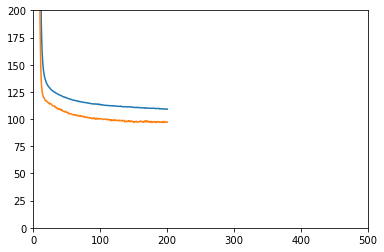

In [145]:
#Create and train age model
age_normalizer = tf.keras.layers.Normalization(axis=-1)
age_normalizer.adapt(age_X)

BATCH_SIZE = 32
model = tf.keras.Sequential([age_normalizer,
                            tf.keras.layers.Dense(100,activation="relu"),
                            tf.keras.layers.Dense(100,activation="relu"),
                            tf.keras.layers.Dense(100,activation="relu"),
                            tf.keras.layers.Dense(1,activation="relu")])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.0001))

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "age_checkpoint.h5", save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=50)

history = model.fit(age_X, age_y, validation_data=(age_X_val, age_y_val), epochs=2000, batch_size=BATCH_SIZE,
          callbacks=[model_checkpoint,early_stopping])

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.axis([0, 500, 0, 200])

model.load_weights('age_checkpoint.h5')

In [146]:
#Use model to fill in missing age values
age_predictions = model.predict(age_X_test.drop(columns = 'PassengerId'))
for i in range(len(age_predictions)):
    PId = age_X_test['PassengerId'].values[i]
    for j in range(len(train_df_par)):
        if PId == train_df_par.at[j,"PassengerId"]:
            train_df_par.at[j,'Age'] = age_predictions[i]
    for j in range(len(test_df_par)):
        if PId == test_df_par.at[j,"PassengerId"]:
            test_df_par.at[j,'Age'] = age_predictions[i]

6/6 [==============================] - 0s 998us/step


In [147]:
#Get training, validation, and test data

X = train_df_par 
X_test = test_df_par

X = X.sample(frac = 1)

X_val = X[math.ceil(len(X)*.8):]
X = X[:math.ceil(len(X)*.8)]

y = X.pop('Survived')
y_val = X_val.pop('Survived')

Epoch 1/2000
23/23 [==============================] - 1s 9ms/step - loss: 0.7057 - accuracy: 0.3927 - val_loss: 0.7125 - val_accuracy: 0.3708
Epoch 2/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4348 - val_loss: 0.7090 - val_accuracy: 0.3820
Epoch 3/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4628 - val_loss: 0.7052 - val_accuracy: 0.3989
Epoch 4/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.4923 - val_loss: 0.7018 - val_accuracy: 0.4326
Epoch 5/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5428 - val_loss: 0.6986 - val_accuracy: 0.4607
Epoch 6/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5919 - val_loss: 0.6953 - val_accuracy: 0.5112
Epoch 7/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.6592 - val_loss: 0.6920 - val_accuracy: 0.5730
Epoch 

23/23 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.8177 - val_loss: 0.5480 - val_accuracy: 0.7640
Epoch 59/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4922 - accuracy: 0.8205 - val_loss: 0.5460 - val_accuracy: 0.7697
Epoch 60/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.8219 - val_loss: 0.5441 - val_accuracy: 0.7640
Epoch 61/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.8247 - val_loss: 0.5418 - val_accuracy: 0.7640
Epoch 62/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.8247 - val_loss: 0.5398 - val_accuracy: 0.7697
Epoch 63/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4814 - accuracy: 0.8261 - val_loss: 0.5378 - val_accuracy: 0.7753
Epoch 64/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.8261 - val_loss: 0.5354 - val_accuracy: 0.7753
Epoch 65/2000

23/23 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8275 - val_loss: 0.4844 - val_accuracy: 0.7865
Epoch 116/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8275 - val_loss: 0.4840 - val_accuracy: 0.7865
Epoch 117/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8275 - val_loss: 0.4835 - val_accuracy: 0.7865
Epoch 118/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8303 - val_loss: 0.4832 - val_accuracy: 0.7921
Epoch 119/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8303 - val_loss: 0.4829 - val_accuracy: 0.7978
Epoch 120/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8303 - val_loss: 0.4827 - val_accuracy: 0.7978
Epoch 121/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8303 - val_loss: 0.4823 - val_accuracy: 0.7978
Epoch 1

Epoch 172/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8471 - val_loss: 0.4766 - val_accuracy: 0.8090
Epoch 173/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8471 - val_loss: 0.4766 - val_accuracy: 0.8090
Epoch 174/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8471 - val_loss: 0.4766 - val_accuracy: 0.8090
Epoch 175/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8471 - val_loss: 0.4765 - val_accuracy: 0.8090
Epoch 176/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8471 - val_loss: 0.4765 - val_accuracy: 0.8146
Epoch 177/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8471 - val_loss: 0.4766 - val_accuracy: 0.8146
Epoch 178/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8471 - val_loss: 0.4767 - val_accuracy:

Epoch 229/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8485 - val_loss: 0.4790 - val_accuracy: 0.8202
Epoch 230/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8485 - val_loss: 0.4794 - val_accuracy: 0.8202
Epoch 231/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8485 - val_loss: 0.4794 - val_accuracy: 0.8202
Epoch 232/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8485 - val_loss: 0.4799 - val_accuracy: 0.8202
Epoch 233/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8499 - val_loss: 0.4800 - val_accuracy: 0.8202
Epoch 234/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8499 - val_loss: 0.4801 - val_accuracy: 0.8202
Epoch 235/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8499 - val_loss: 0.4801 - val_accuracy:

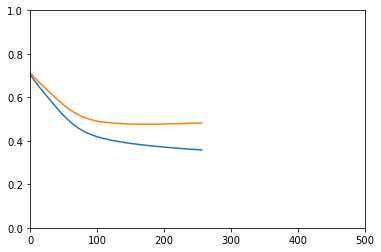

In [148]:
#Model declaration and training
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)


BATCH_SIZE = 32
model = tf.keras.Sequential([normalizer,
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(tf.keras.optimizers.Adam(0.00001), loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "checkpoint.h5", save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=100)

history = model.fit(X, y, validation_data=(X_val, y_val), epochs=2000, batch_size=BATCH_SIZE,
          callbacks=[model_checkpoint,early_stopping])

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.axis([0, 500, 0, 1])

model.load_weights("checkpoint.h5")

In [149]:
#Make our predictions and submit
submission = pd.DataFrame()
submission['PassengerId'] = test_df_par['PassengerId']
submission['Survived'] = model.predict(X_test)
submission['Survived'] = [1 if x >= 0.5 else 0 for x in submission['Survived']]
submission.to_csv('submission.csv', index=False)

14/14 [==============================] - 0s 995us/step
